In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
data = pd.read_csv("/content/drive/MyDrive/public_dataset/housing.csv")

**BÀI TẬP**

BÀI 1. Thực hiện lại 7 câu hỏi trong bài hướng dẫn

Câu hỏi 1)

In [3]:
max(data.median_house_value)

500001.0

In [4]:
min(data.median_house_value)

14999.0

In [5]:
np.mean(data.median_house_value)

206855.81690891474

In [6]:
np.median(data.median_house_value)

179700.0

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


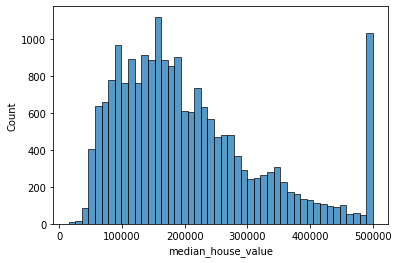

In [8]:
sns.histplot(data['median_house_value'])

Nhận xét: Giá nhà dao động từ khoảng 14999 đô => 500001 đô. Giá nhà trung bình là ~200k đô. Giá nhà phổ biến chủ yếu nằm ở mức từ khoảng ~80000 đô => ~180000 đô, và ít phổ biến khi giá tăng dần lên 500k đô. Và mức giá nhà khoảng 500k đô khá nhiều.

Câu hỏi 2)

In [9]:
data.shape

(20640, 10)

In [10]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Trả lời: Bộ dữ liệu có 20640 dòng, 10 thuộc tính 

Câu hỏi 3)

In [11]:
data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [12]:
a = data.columns
for i in range(10):
  print(a[i] + ": " + str(pd.isnull(data[a[i]]).sum()))

longitude: 0
latitude: 0
housing_median_age: 0
total_rooms: 0
total_bedrooms: 207
population: 0
households: 0
median_income: 0
median_house_value: 0
ocean_proximity: 0


Câu hỏi 4) 

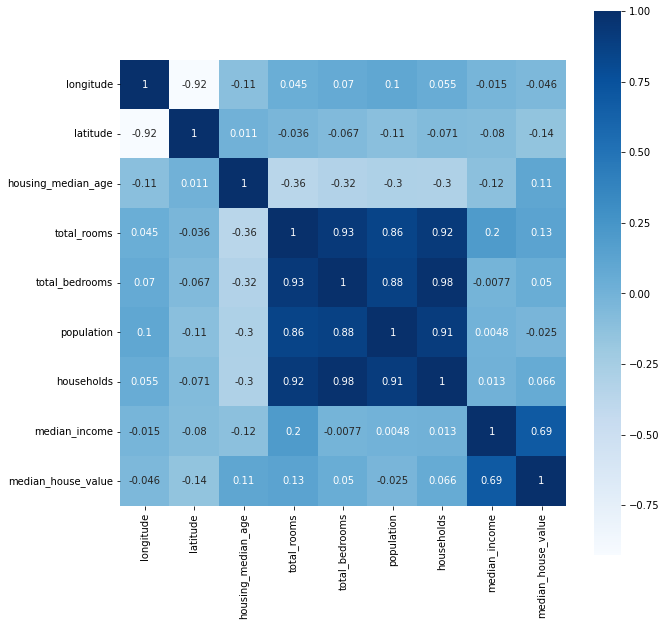

In [13]:
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

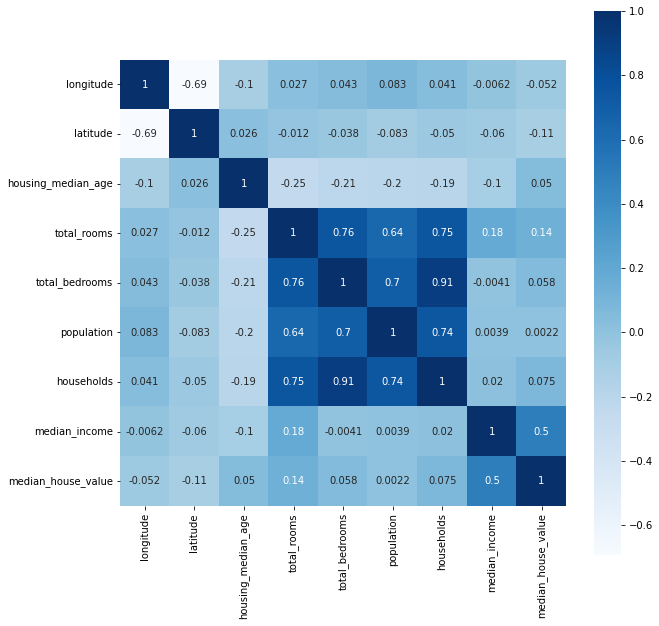

In [14]:
correlation = data.corr(method='kendall')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

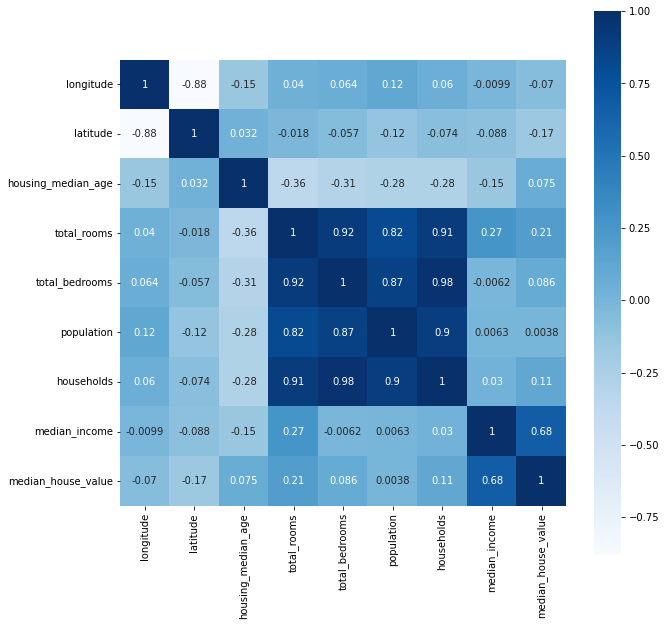

In [15]:
correlation = data.corr(method='spearman')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Trả lời: Thuộc tính có mối tương quan nhất với thuộc tính dự đoán median_house_value là: median_income . Vì giá trị thu được của các ô gồm median_house_value và median_income khi sử dụng pearson, kendall, spearman lần lượt là 0.69, 0.5 0.68 (cao nhất so với các cặp khác)

Câu hỏi 5) 

In [16]:
X = data['median_income']
y = data['median_house_value']

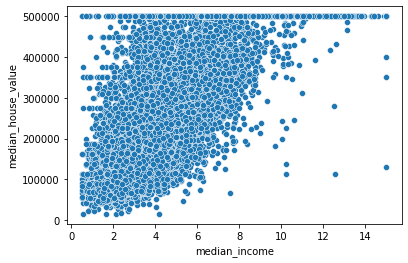

In [17]:
data_visualize = pd.DataFrame({"median_income": X, "median_house_value": y})
sns.scatterplot(data = data_visualize, x="median_income", y="median_house_value")

Câu hỏi 6) 

In [18]:
data_end = int(np.floor(0.8*(X.shape[0])))
X_train = X[0:data_end].values.reshape(-1,1)
X_test = X[data_end:].values.reshape(-1,1)
y_train = y[0:data_end]
y_test = y[data_end:]

Câu hỏi 7)

In [19]:
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train_transformed)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mean_squared_error(y_test_transformed, y_pred, squared = True)

85.08611889739782

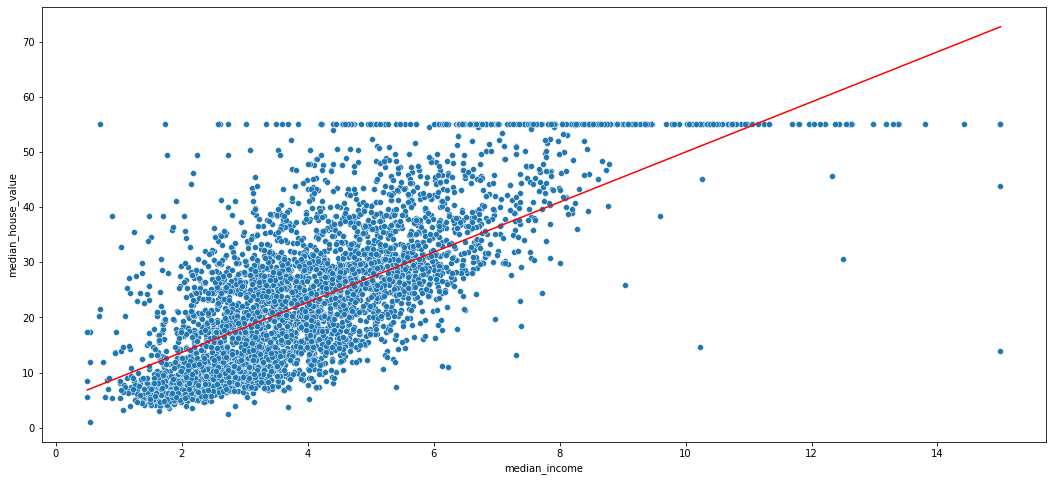

In [24]:
test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred})
fig= plt.figure(figsize=(18,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")

BÀI 2

In [51]:
X = data['total_bedrooms']
y = data['median_house_value']
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
X_processed = imp.fit_transform(X.values.reshape(-1,1))
kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
avg_mse = []

sc = MinMaxScaler(feature_range=(1, 55))
y = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

for train_index, test_index in kf.split(y, y):
 X_train = X_processed[train_index]
 y_train = y[train_index]
 X_test = X_processed[test_index]
 y_test = y[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)
 
 # Lưu lại kết quả từng fold vào avg_mse 
 avg_mse.append(result)
np.mean(np.array(avg_mse))

164.12553667335152

In [29]:
X = data['median_income']
y = data['median_house_value']
X_processed = X.values.reshape(-1,1)
kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
avg_mse = []
sc = MinMaxScaler(feature_range=(1, 55))
y = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)
for train_index, test_index in kf.split(y,y):
 X_train = X_processed[train_index]
 y_train = y[train_index]
 X_test = X_processed[test_index]
 y_test = y[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)
 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse.append(result)
np.mean(np.array(avg_mse))

87.88029722015604

Trả lời: Kết quả khi dự đoán bằng thuộc tính median_income tốt hơn so với khi dự đoán bằng thuộc tính 
total_bedrooms. Vì chỉ số  trung bình kết quả của mỗi lần chia (split) của median_income là ~ 87 thấp hơn so với  trung bình kết quả của mỗi lần chia (split) của total_bedrooms là ~164

BÀI 3* 



In [42]:
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
X = data[['median_income', 'total_bedrooms']]
y = data['median_house_value']
X_processed = imp.fit_transform(X.values.reshape(-1,1))
kf = ShuffleSplit(n_splits = 10, test_size=0.2, random_state=42)
avg_mse = []
sc = MinMaxScaler(feature_range=(1, 55))
y = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)
for train_index, test_index in kf.split(y, y):
 X_train = X_processed[train_index]
 y_train = y[train_index]
 X_test = X_processed[test_index]
 y_test = y[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)
 avg_mse.append(result)

np.mean(np.array(avg_mse))

164.61130709940858

Trả lời: Mô hình dự đoán kém chất lượng hơn khi kết hợp cả 2 thuộc tính median_income và total_bedrooms so với mô hình riêng của từng thuộc tính. Chỉ số MSE của mô hình khi kết hợp 2 thuộc tính là 164.6 cao hơn 1 chút so với MSE của mô hình có riêng thuộc tính total_bedrooms. 